In [2]:
import pandas as pd
import numpy as np
import os

def row_num(x=None): return pd.set_option('display.max_rows',x)
def col_num(x=None): return pd.set_option('display.max_columns',x)

In [3]:
os.getcwd()

'c:\\Users\\yunjc\\python_jupyter\\Project_DA\\bigdatamap'

# 1.DATA LOAD
---

## 1.1. KOSIS 원본 데이터

In [15]:
# 데이터 불러오기
# df = pd.read_csv('data/101_DT_1B040M5_20211128155227.csv',encoding='euc-kr')
df19 = pd.read_csv('data/2019_총인구.csv',encoding='euc-kr')
df20 = pd.read_csv('data/2020_총인구.csv',encoding='euc-kr')

df20.head()

,시도명,시군구명,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세이상
0,전구,전국,51829136,1722081,2264595,2267481,2449561,3364804,3666212,3301331,...,4210645,3885297,2734187,2027679,1600867,1120781,563930,192663,41512,5624
1,서울특별시,종로구,151291,3130,4217,4721,7656,14111,13997,10662,...,12258,10978,7882,6119,5295,3582,1694,595,164,22
2,서울특별시,중구,128744,3573,3485,2879,4450,10206,12010,11031,...,10444,9969,7159,5497,4388,2832,1291,504,97,11
3,서울특별시,용산구,225882,7383,7502,6878,8206,14687,20386,20002,...,17270,15838,11098,8533,6989,4912,2336,785,191,26
4,서울특별시,성동구,291918,10310,10050,8590,10975,22060,26285,23986,...,22955,21191,14583,11087,8765,5536,2401,771,182,25


## 1.2.시군구 코드 데이터

In [16]:
df_t = pd.read_csv('data/데이터정제_최종.csv', encoding='euc-kr')
df_t.head()
df_scd = df_t.loc[:,['시군구코드','시도명','시군구명']]
df_scd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구코드   229 non-null    int64 
 1   시도명     229 non-null    object
 2   시군구명    229 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.5+ KB


In [22]:
temp = pd.merge(left=df_scd, right=df19.loc[:,['시도명','시군구명','합계']], on=['시도명','시군구명'], how='left')
temp.rename(columns={'합계':'2019_총인구'},inplace=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구코드     229 non-null    int64 
 1   시도명       229 non-null    object
 2   시군구명      229 non-null    object
 3   2019_총인구  229 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [27]:
temp2 = pd.merge(left=temp, right=df20.loc[:,['시도명','시군구명','합계']], on=['시도명','시군구명'], how='left')
temp2.rename(columns={'합계':'2020_총인구'},inplace=True)
temp2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구코드     229 non-null    int64 
 1   시도명       229 non-null    object
 2   시군구명      229 non-null    object
 3   2019_총인구  229 non-null    int64 
 4   2020_총인구  229 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 10.7+ KB


<AxesSubplot:>

C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_f

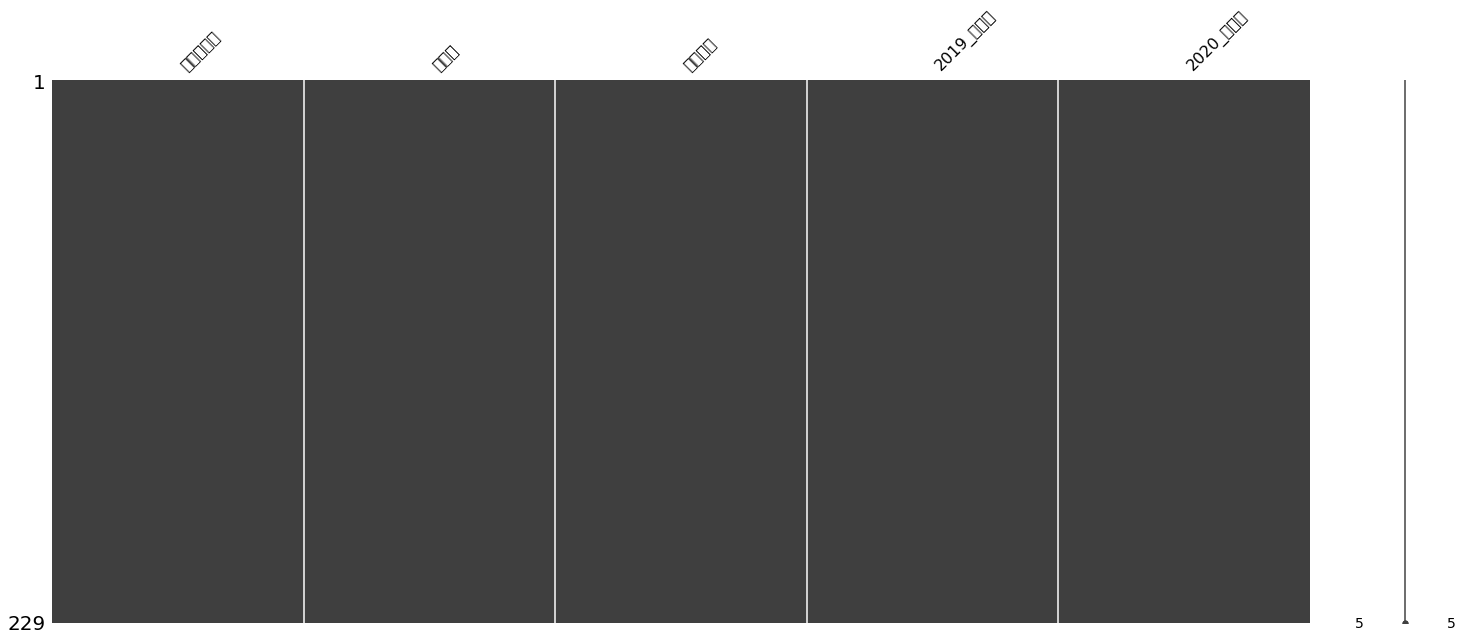

In [28]:
import missingno as msno
msno.matrix(temp2)

In [29]:
temp2.head()

,시군구코드,시도명,시군구명,2019_총인구,2020_총인구
0,11010,서울특별시,종로구,154969,151291
1,11020,서울특별시,중구,130957,128744
2,11030,서울특별시,용산구,227181,225882
3,11040,서울특별시,성동구,299688,291918
4,11050,서울특별시,광진구,359766,353967


In [30]:
temp2.to_csv('data/1920_총인구합산.csv',encoding='euc-kr')

# 2.데이터 연령별 정제

## 2.1. 연도별 나누기

In [10]:
# 2019년도 중 전국 아닌 데이터
df_m19 = pd.merge(left=df_scd, right=df19)

,시군구,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세이상
2,서울특별시,9586195,278869,343206,353042,408748,664188,835286,734952,745117,...,743817,712641,520889,391970,290634,179109,81514,28197,6251,884
3,종로구,151291,3130,4217,4721,7656,14111,13997,10662,10065,...,12258,10978,7882,6119,5295,3582,1694,595,164,22
4,중구,128744,3573,3485,2879,4450,10206,12010,11031,10474,...,10444,9969,7159,5497,4388,2832,1291,504,97,11
5,용산구,225882,7383,7502,6878,8206,14687,20386,20002,19566,...,17270,15838,11098,8533,6989,4912,2336,785,191,26
6,성동구,291918,10310,10050,8590,10975,22060,26285,23986,25076,...,22955,21191,14583,11087,8765,5536,2401,771,182,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,읍부,153767,4959,7446,6923,6445,7472,8697,8049,10699,...,12694,11755,8358,6960,6032,5017,3013,983,310,60
318,면부,35539,949,1394,1333,1105,1669,1984,1732,2213,...,3179,3088,2199,1910,1626,1344,775,226,77,12
319,동부,481552,20060,26430,26482,25729,30777,32813,28870,36999,...,35803,30832,20722,15886,12108,8338,4760,1662,520,82
320,제주시,492306,19587,26546,25952,25636,31396,33467,29299,37464,...,37014,31894,21497,16540,13011,9712,5637,2032,635,99


In [60]:
# 시군구 코드를 살펴보고, 걸러내기
df_sgg19['시군구코드'].apply(lambda x: len(str(x))).unique()
df_sgg20['시군구코드'].apply(lambda x: len(str(x))).unique()

array([2, 5], dtype=int64)

In [61]:
# 시군구 코드 2자리 수의 unique 값 확인
df_sgg19.loc[df_sgg19['시군구코드'].apply(lambda x: len(str(x)))==2]['시군구'].unique()
df_sgg20.loc[df_sgg20['시군구코드'].apply(lambda x: len(str(x)))==2]['시군구'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [66]:
# 시군구 2자리 매칭 인덱스
df_sido19_idx = df_sgg19[df_sgg19['시군구코드'].apply(lambda x: len(str(x)))==2][['시군구코드','시군구']].drop_duplicates(subset=['시군구코드'])
df_sido20_idx = df_sgg20[df_sgg20['시군구코드'].apply(lambda x: len(str(x)))==2][['시군구코드','시군구']].drop_duplicates(subset=['시군구코드'])
df_sido19_idx.reset_index(inplace=True, drop=True)
df_sido20_idx.reset_index(inplace=True, drop=True)
row_num()
df_sido20_idx

,시군구코드,시군구
0,11,서울특별시
1,21,부산광역시
2,22,대구광역시
3,23,인천광역시
4,24,광주광역시
5,25,대전광역시
6,26,울산광역시
7,29,세종특별자치시
8,31,경기도
9,32,강원도


-- 시군구 코드를 살펴 본 결과 --

- 시군구 코드 2자리는 결과적으로 시도코드
- 따라서 시군구코드만 사용하기 위해 5자리 코드만을 남김

In [67]:
df_sgg19 = df_sgg19.loc[df_sgg19['시군구코드'].apply(lambda x: len(str(x)))==5]
df_sgg20 = df_sgg20.loc[df_sgg20['시군구코드'].apply(lambda x: len(str(x)))==5]

In [79]:
# 시군구코드를 기반으로 시도 단위를 추가해줌
df_sgg19['시도'] = [np.nan]*len(df_sgg19)
df_sgg20['시도'] = [np.nan]*len(df_sgg20)
cnt = 0
for sido in df_sido19_idx['시군구코드']:
    sd19_idx = df_sgg19.loc[df_sgg19['시군구코드'].apply(lambda x: str(x)[:2])==str(sido)].index
    sd20_idx = df_sgg20.loc[df_sgg20['시군구코드'].apply(lambda x: str(x)[:2])==str(sido)].index
    df_sgg19.loc[sd19_idx,'시도'] = df_sido19_idx.loc[cnt,'시군구']
    df_sgg20.loc[sd20_idx,'시도'] = df_sido20_idx.loc[cnt,'시군구']
    cnt+=1
    


C:\Users\yunjc\AppData\Local\Temp/ipykernel_18180/1752571375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgg20['시도'] = [np.nan]*len(df_sgg20)
C:\Users\yunjc\anaconda3\envs\main\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [82]:
sido_sgg_match = df_sgg19[['시군구코드','시도','시군구']].drop_duplicates(subset='시군구코드').reset_index(drop=True)
row_num(10)
sido_sgg_match

,시군구코드,시도,시군구
0,11010,서울특별시,종로구
1,11020,서울특별시,중구
2,11030,서울특별시,용산구
3,11040,서울특별시,성동구
4,11050,서울특별시,광진구
...,...,...,...
256,38380,경상남도,함양군
257,38390,경상남도,거창군
258,38400,경상남도,합천군
259,39010,제주특별자치도,제주시


In [84]:
# sido_sgg_match.to_csv('data/시도_시군구_매치정보.csv',encoding='euc-kr',index=False)

## 2.2. 시군구-연령별 나누기

In [119]:
# 가공없이 pivot_table 확인
pt_19 = pd.pivot_table(data=df_sgg19, values='주민등록연앙인구(명)',columns='연령별',index='시군구코드',aggfunc='sum')
pt_20 = pd.pivot_table(data=df_sgg20, values='주민등록연앙인구(명)',columns='연령별',index='시군구코드',aggfunc='sum')

## 2.3. 고령 인구로 정제

In [120]:
pt_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 11010 to 39020
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0 - 4세    261 non-null    float64
 1   10 - 14세  261 non-null    float64
 2   100세 이상   261 non-null    float64
 3   15 - 19세  261 non-null    float64
 4   20 - 24세  261 non-null    float64
 5   25 - 29세  261 non-null    float64
 6   30 - 34세  261 non-null    float64
 7   35 - 39세  261 non-null    float64
 8   40 - 44세  261 non-null    float64
 9   45 - 49세  261 non-null    float64
 10  5 - 9세    261 non-null    float64
 11  50 - 54세  261 non-null    float64
 12  55 - 59세  261 non-null    float64
 13  60 - 64세  261 non-null    float64
 14  65 - 69세  261 non-null    float64
 15  70 - 74세  261 non-null    float64
 16  75 - 79세  261 non-null    float64
 17  80 - 84세  261 non-null    float64
 18  80세 이상    261 non-null    float64
 19  85 - 89세  261 non-null    float64
 20  85세 이상    261 non-null    

In [121]:
pt_19.drop(['80세 이상','85세 이상'], axis=1, inplace=True)
pt_19.info()
pt_20.drop(['80세 이상','85세 이상'], axis=1, inplace=True)
pt_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 11010 to 39020
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0 - 4세    261 non-null    float64
 1   10 - 14세  261 non-null    float64
 2   100세 이상   261 non-null    float64
 3   15 - 19세  261 non-null    float64
 4   20 - 24세  261 non-null    float64
 5   25 - 29세  261 non-null    float64
 6   30 - 34세  261 non-null    float64
 7   35 - 39세  261 non-null    float64
 8   40 - 44세  261 non-null    float64
 9   45 - 49세  261 non-null    float64
 10  5 - 9세    261 non-null    float64
 11  50 - 54세  261 non-null    float64
 12  55 - 59세  261 non-null    float64
 13  60 - 64세  261 non-null    float64
 14  65 - 69세  261 non-null    float64
 15  70 - 74세  261 non-null    float64
 16  75 - 79세  261 non-null    float64
 17  80 - 84세  261 non-null    float64
 18  85 - 89세  261 non-null    float64
 19  90 - 94세  261 non-null    float64
 20  95 - 99세  261 non-null    

In [122]:
old_pop19 = pt_19['100세 이상']+pt_19.iloc[:,14:21].sum(axis=1)
old_pop19
old_pop20 = pt_20['100세 이상']+pt_20.iloc[:,14:21].sum(axis=1)
old_pop20

시군구코드
11010    25595.0
11020    21877.0
11030    35173.0
11040    42931.0
11050    47426.5
          ...   
38380    12938.5
38390    16719.5
38400    17182.0
39010    67660.5
39020    34152.0
Length: 261, dtype: float64

In [123]:
df_fin19 = pd.DataFrame([])
df_fin19['시군구코드'] = pt_19.index
df_fin19['고령화인구수'] = old_pop19.values
df_fin19['총인구'] = pt_19['계'].values

df_fin19.info()

df_fin20 = pd.DataFrame([])
df_fin20['시군구코드'] = pt_20.index
df_fin20['고령화인구수'] = old_pop20.values
df_fin20['총인구'] = pt_20['계'].values

df_fin20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구코드   261 non-null    int64  
 1   고령화인구수  261 non-null    float64
 2   총인구     261 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구코드   261 non-null    int64  
 1   고령화인구수  261 non-null    float64
 2   총인구     261 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


# 3.데이터 합치기

In [88]:
df_main = pd.read_csv('data/데이터초안.csv',encoding='euc-kr',engine='python')
df_main.head()

,SIG_CD,시군구명,2019_예산,2020_예산,장기요양,노인 돌봄,치매 돌봄,노인일자리,지역통합 돌봄,노인건강관리,...,2019_노인1인인구,2020_노인1인인구,총복지시설,1,2,3,4,5,6,요양관련종사자
0,서울특별시,종로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,중구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시,용산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울특별시,성동구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울특별시,광진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# 시도, 시군구를 복합키로 합치기
df_merge = pd.merge(left=df_main[['SIG_CD','시군구명']], right=sido_sgg_match, left_on=['SIG_CD','시군구명'], right_on=['시도','시군구'], how='left')

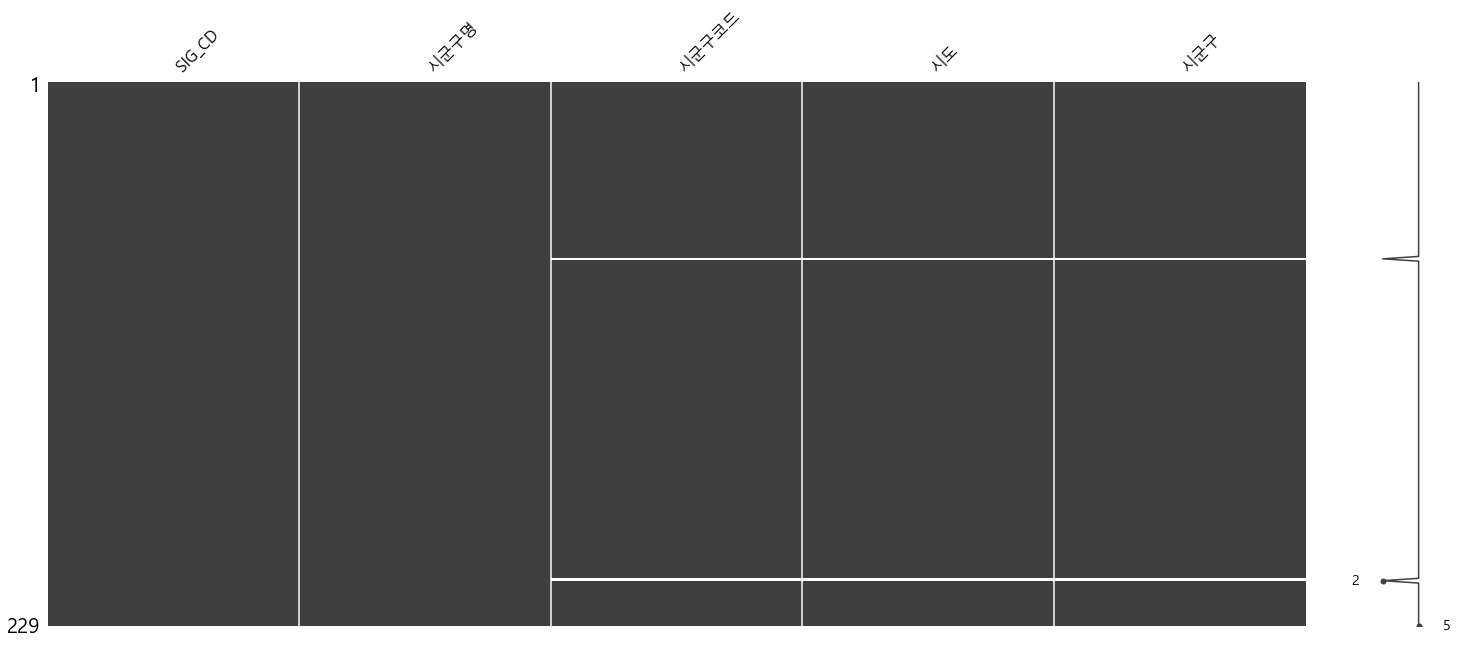

In [138]:
import missingno as msno
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

msno.matrix(df_merge)
plt.show()

In [139]:
df_merge.loc[df_merge['시군구코드'].isna()]

,SIG_CD,시군구명,시군구코드,시도,시군구
74,세종시,세종시,NaN,NaN,NaN
209,경상남도,창원시,NaN,NaN,NaN


In [144]:
row_num()
sido_sgg_match.loc[sido_sgg_match['시군구']=='통합창원시']

,시군구코드,시도,시군구
243,38110,경상남도,통합창원시


In [146]:
sido_sgg_match.loc[243,'시군구'] = '창원시'

In [143]:
row_num()
sido_sgg_match.loc[sido_sgg_match['시군구']=='세종시']

,시군구코드,시도,시군구
74,29010,세종특별자치시,세종시


In [149]:
# 시도, 시군구를 복합키로 합치기
df_merge = pd.merge(left=df_main[['SIG_CD','시군구명']], right=sido_sgg_match, left_on=['SIG_CD','시군구명'], right_on=['시도','시군구'], how='left')

In [ ]:
sido_sgg_match.loc[74,'시도']='세종시'

<AxesSubplot:>

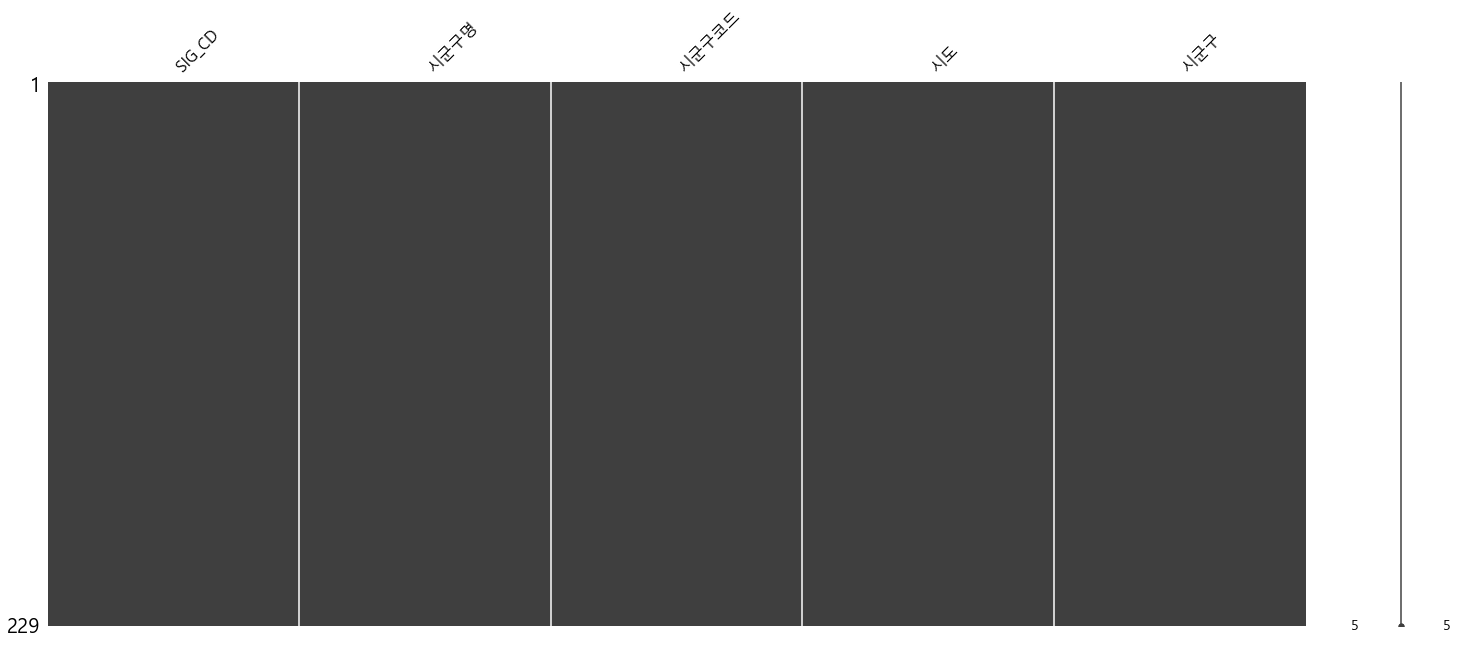

In [150]:
msno.matrix(df_merge)

In [153]:
row_num(10)
df_fin = df_merge.iloc[:,:3]
df_fin = pd.merge(left=df_fin, right=df_fin19, on='시군구코드', how='left')
df_fin.rename(columns={'총인구':'2019_총인구'},inplace=True)

df_fin = pd.merge(left=df_fin, right=df_fin20, on='시군구코드', how='left')
df_fin.rename(columns={'총인구':'2020_총인구'},inplace=True)
df_fin

,SIG_CD,시군구명,시군구코드,고령화인구수_x,2019_총인구,고령화인구수_y,2020_총인구
0,서울특별시,종로구,11010,24829.5,146603.0,25595.0,144865.5
1,서울특별시,중구,11020,20730.0,121678.0,21877.0,121519.5
2,서울특별시,용산구,11030,34079.0,218821.0,35173.0,219403.5
3,서울특별시,성동구,11040,41605.5,299044.0,42931.0,291841.0
4,서울특별시,광진구,11050,45066.5,348116.5,47426.5,343783.0
...,...,...,...,...,...,...,...
224,경상남도,함양군,38380,12641.5,39519.0,12938.5,39045.0
225,경상남도,거창군,38390,16317.0,61957.5,16719.5,61478.0
226,경상남도,합천군,38400,17018.0,45111.5,17182.0,44159.5
227,제주특별자치도,제주시,39010,64300.0,483543.5,67660.5,486839.0


In [154]:
df_res = df_fin[['SIG_CD','시군구명','시군구코드','2019_총인구','2020_총인구']]
df_res

,SIG_CD,시군구명,시군구코드,2019_총인구,2020_총인구
0,서울특별시,종로구,11010,146603.0,144865.5
1,서울특별시,중구,11020,121678.0,121519.5
2,서울특별시,용산구,11030,218821.0,219403.5
3,서울특별시,성동구,11040,299044.0,291841.0
4,서울특별시,광진구,11050,348116.5,343783.0
...,...,...,...,...,...
224,경상남도,함양군,38380,39519.0,39045.0
225,경상남도,거창군,38390,61957.5,61478.0
226,경상남도,합천군,38400,45111.5,44159.5
227,제주특별자치도,제주시,39010,483543.5,486839.0


In [157]:
df_mid = pd.read_csv('data/데이터_중간.csv',encoding='euc-kr')
df_mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SIG_CD             229 non-null    object 
 1   시군구명               229 non-null    object 
 2   2019_노인청소년_예산      229 non-null    object 
 3   2020_노인,청소년_예산     229 non-null    object 
 4   예산변화량              228 non-null    float64
 5   2019_전체예산          228 non-null    float64
 6   2020_전체예산          228 non-null    float64
 7   2019_노인1인인구        229 non-null    int64  
 8   2020_노인1인인구        229 non-null    int64  
 9   2019_노인인구          229 non-null    int64  
 10  2020_노인인구          229 non-null    int64  
 11  총복지시설              229 non-null    int64  
 12  노인주거복지시설           229 non-null    int64  
 13  노인의료복지시설           229 non-null    int64  
 14  노인여가복지시설           229 non-null    int64  
 15  재가노인복지시설           229 non-null    int64  
 16  노인일자리 지원기관         229 non

In [160]:
df_last= pd.merge(left = df_mid,
                  right = df_res,
                  on = ['SIG_CD','시군구명'],
                  how = 'left')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SIG_CD             229 non-null    object 
 1   시군구명               229 non-null    object 
 2   2019_노인청소년_예산      229 non-null    object 
 3   2020_노인,청소년_예산     229 non-null    object 
 4   예산변화량              228 non-null    float64
 5   2019_전체예산          228 non-null    float64
 6   2020_전체예산          228 non-null    float64
 7   2019_노인1인인구        229 non-null    int64  
 8   2020_노인1인인구        229 non-null    int64  
 9   2019_노인인구          229 non-null    int64  
 10  2020_노인인구          229 non-null    int64  
 11  총복지시설              229 non-null    int64  
 12  노인주거복지시설           229 non-null    int64  
 13  노인의료복지시설           229 non-null    int64  
 14  노인여가복지시설           229 non-null    int64  
 15  재가노인복지시설           229 non-null    int64  
 16  노인일자리 지원기관         229 non

In [161]:
df_last.to_csv('data/데이터정제_최종.csv',encoding='euc-kr',index=False)